#### Final assignment - Heart dataset - Group 2 - Alessandro, Fadi & Timon

**Context:**

<sub>
Cardiovascular diseases (CVDs) are the leading cause of death globally, accounting for an estimated 17.9 million lives each year (31% of all deaths). Four out of 5 CVD deaths result from heart attacks and strokes, with one-third occurring prematurely in individuals under 70 years old. Heart failure is a common event caused by CVDs, and this dataset comprises 11 features for predicting potential heart disease. Early detection and management are crucial for people with cardiovascular disease or those at high cardiovascular risk (due to risk factors such as hypertension, diabetes, hyperlipidemia, or established disease), where a machine learning model can be invaluable.
</sub>

**Goal:**

<sub>To predict the likelihood of heart failure based on the "Heart Failure Prediction" dataset. The output will be a binary classification (0 or 1) representing the likelihood of heart failure.</sub>

**Features (x):**

<sub>The features to be used are as follows: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina,	Oldpeak	ST_Slope & HeartDisease.</sub>

**Target Variable (y):**

<sub>The target variable is "HeartDisease."</sub>

**Attribute Information:**

<sub>

- Age: Age of the patient [years]
- Sex: Sex of the patient [M: Male, F: Female]
- ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: Resting blood pressure [mm Hg]
- Cholesterol: Serum cholesterol [mm/dl]
- FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
- Oldpeak: Oldpeak = ST [Numeric value measured in depression]
- ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: Output class [1: heart disease, 0: Normal]

</sub>

##### Step 1 - Data Loading and Initial Exploration:
<sub>

- Load the dataset into a Pandas DataFrame.
- Display basic information about the dataset.

</sub>

In [214]:
# Imports.
import pandas as pd
import matplotlib.pyplot as plt

# Assign & print the dataset.
dataset = 'data/modified_heart_dataset_supervised.csv'
df = pd.read_csv(dataset)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [215]:
# Display basic information about the dataset and check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

##### Step 2 - Data Preparation

<sub>

- Identify and handle missing values.

</sub>

In [216]:
# Secondary check for missing values.
missing_values = df.isnull().sum()
print(missing_values)

# No missing values found, proceed to the next step.

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
GeneticMarker1        0
GeneticMarker2        0
BodyWeightCategory    0
HeartDisease          0
dtype: int64


In [217]:
# Check for duplicate values.
duplicate_values = df.duplicated().sum()
print(duplicate_values)

# No duplicate values found, proceed to the next step.

0


In [218]:
# Fadi and Alex raised concerns about the cholesterol column. Seems to have a rather high amount of 0 values. Doing a check here.
zero_cholesterol_count = (df['Cholesterol'] == 0).sum()
print(f"The number of patients with a cholesterol value of 0 is {zero_cholesterol_count}.")
# Amount of 0 values for the cholesterol column seems to be too high. Will need to be explored further during EDA.

The number of patients with a cholesterol value of 0 is 14.


##### Step 3 - Exploratory Data Analysis (EDA)

<sub>

- Create visualizations to explore the relationships between the features and the target variable.
- Analyze the distribution of the target variable.

</sub>

In [219]:
# Display the summary statistics.
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.239651   198.787582    0.233115  136.643791   
std      9.432617   18.804257   109.529397    0.423046   25.662700   
min     28.000000    1.000000    -5.000000    0.000000   56.000000   
25%     47.000000  120.000000   173.000000    0.000000  118.000000   
50%     54.000000  131.000000   223.000000    0.000000  137.000000   
75%     60.000000  143.000000   267.000000    0.000000  156.000000   
max     77.000000  201.000000   607.000000    1.000000  201.000000   

          Oldpeak  GeneticMarker1  GeneticMarker2  HeartDisease  
count  918.000000      918.000000      918.000000    918.000000  
mean     0.887364        0.508888    10540.282135      0.553377  
std      1.066570        0.291353     6242.988493      0.497414  
min     -2.600000        0.000188     -365.000000      0.000000  
25%      0.000000        0.254569     7

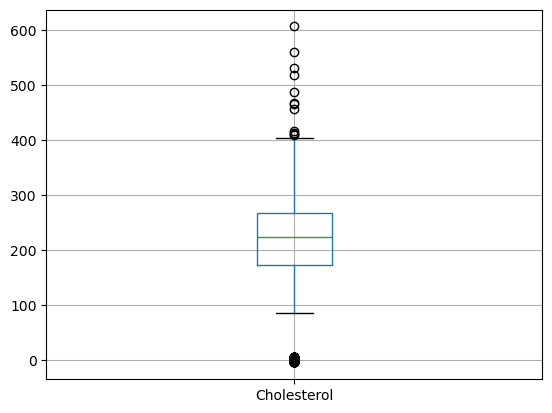

In [220]:
# Create a boxplot for the "Cholesterol" column.
df.boxplot(column='Cholesterol')
plt.show()

# Looking at the boxplot, there are a lot of outliers. Will need to be addressed in the next step by removing them.

In [221]:
# Calculate the IQR for the "Cholesterol" column.
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the "Cholesterol" column.
df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

# Display the summary statistics again to check results.
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  734.000000  734.000000   734.000000  734.000000  734.000000   
mean    52.889646  132.930518   240.807902    0.164850  140.158038   
std      9.494312   17.664659    51.121580    0.371298   24.703858   
min     28.000000   89.000000    86.000000    0.000000   71.000000   
25%     46.000000  121.000000   207.000000    0.000000  122.000000   
50%     54.000000  132.000000   236.000000    0.000000  141.000000   
75%     59.000000  143.000000   274.750000    0.000000  159.000000   
max     77.000000  196.000000   403.000000    1.000000  201.000000   

          Oldpeak  GeneticMarker1  GeneticMarker2  HeartDisease  
count  734.000000      734.000000      734.000000    734.000000  
mean     0.900954        0.507698    12774.478202      0.475477  
std      1.071986        0.293573     3699.655971      0.499739  
min     -0.100000        0.000188     3836.000000      0.000000  
25%      0.000000        0.253065    10

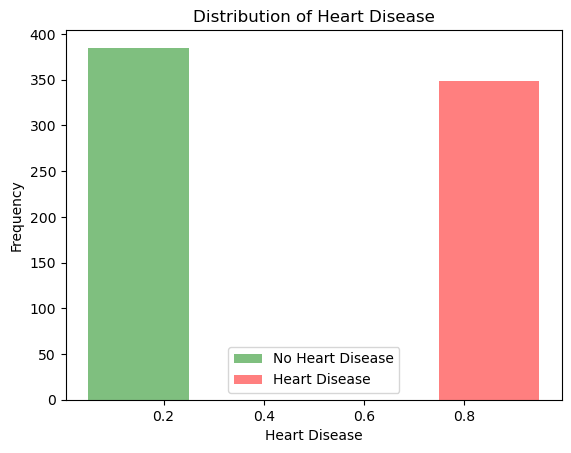

In [222]:
# Filter the dataframe for heart disease cases and non-heart disease cases.
heart_disease = df[df['HeartDisease'] == 1]['HeartDisease']
no_heart_disease = df[df['HeartDisease'] == 0]['HeartDisease']

# Set the number of bins for the histogram.
bins = 2

# Create a single histogram with side-by-side bars.
plt.hist([no_heart_disease, heart_disease], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])

# Add labels and title to the histogram.
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Disease')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# The amount of people with and without heart disease is almost equal. This is good as it means the dataset is balanced.

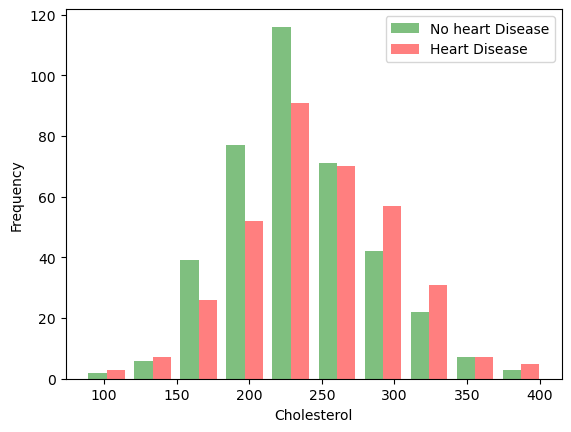

In [223]:
# Explore the relation between the "Cholesterol" and "HeartDisease" columns sing a histogram with side-by-side bars.

# Replace string values with integer values in the 'HeartDisease' column.
df.loc[df['HeartDisease'] == 'No heart Disease', 'HeartDisease'] = 0
df.loc[df['HeartDisease'] == 'Heart Disease', 'HeartDisease'] = 1

# Create the histograms side-by-side
plt.hist([df[df['HeartDisease'] == 0]['Cholesterol'], df[df['HeartDisease'] == 1]['Cholesterol']], bins=10, alpha=0.5, label=['No heart Disease', 'Heart Disease'], color=['green', 'red'], histtype='bar')

# Add labels and show the plot.
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# There seems to be a relation between the cholesterol level and heart disease. The higher the cholesterol level, 
# the higher the chance of heart disease and vice versa.

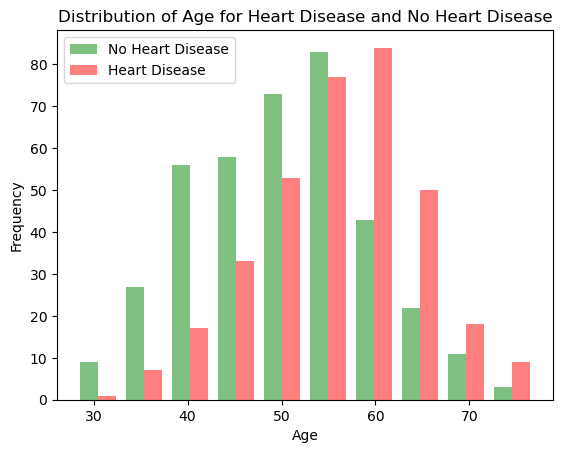

In [224]:
# Explore the relation between the "Age" and "HeartDisease" columns using a histogram with side-by-side bars.

# Filter the dataframe for heart disease cases and non-heart disease cases.
heart_disease = df[df['HeartDisease'] == 1]['Age']
no_heart_disease = df[df['HeartDisease'] == 0]['Age']

# Set the number of bins for the histogram.
bins = 10

# Create a single histogram with side-by-side bars.
plt.hist([no_heart_disease, heart_disease], bins=bins, alpha=0.5, label=['No Heart Disease', 'Heart Disease'], color=['green', 'red'])

# Add labels and title to the histogram.
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Heart Disease and No Heart Disease')

# Add legend to the histogram.
plt.legend()

# Show the plot.
plt.show()

# From the looks of it, there seems to also be a relation between age and heart disease. Older people seem to be more prone to heart disease.

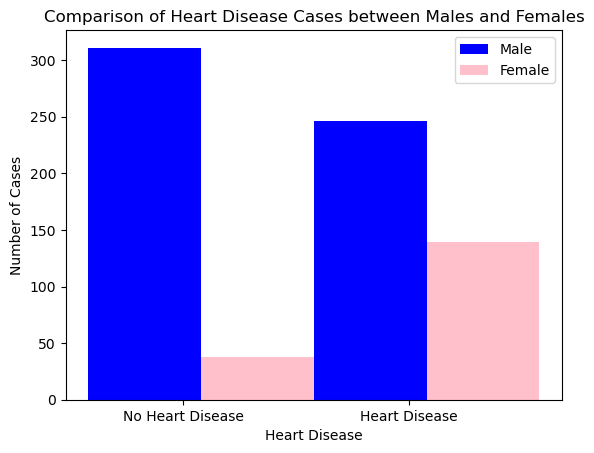

In [225]:
# Explore the relation between the "Sex" and "HeartDisease" columns using two histograms with side-by-side bars.

# Filter the dataframe for heart disease cases and non-heart disease cases for males and females.
male_heart_disease = df[(df['HeartDisease'] == 1) & (df['Sex'] == 'M')]
male_no_heart_disease = df[(df['HeartDisease'] == 0) & (df['Sex'] == 'M')]
female_heart_disease = df[(df['HeartDisease'] == 1) & (df['Sex'] == 'F')]
female_no_heart_disease = df[(df['HeartDisease'] == 0) & (df['Sex'] == 'F')]

# Set the number of categories and the width of each bar.
categories = ['No Heart Disease', 'Heart Disease']
bar_width = 0.5

# Set the x-axis positions for the bars.
male_positions = [0, 1]
female_positions = [x + bar_width for x in male_positions]

# Set the heights of the bars.
male_heights = [len(male_heart_disease), len(male_no_heart_disease)]
female_heights = [len(female_heart_disease), len(female_no_heart_disease)]

# Create the bar plot.
plt.bar(male_positions, male_heights, bar_width, label='Male', color='blue')
plt.bar(female_positions, female_heights, bar_width, label='Female', color='pink')

# Add labels and title to the plot.
plt.xlabel('Heart Disease')
plt.ylabel('Number of Cases')
plt.title('Comparison of Heart Disease Cases between Males and Females')

# Add x-axis tick labels.
plt.xticks([0.17, 1.17], categories)

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

# There seems to be a very strong relation between sex and heart disease.

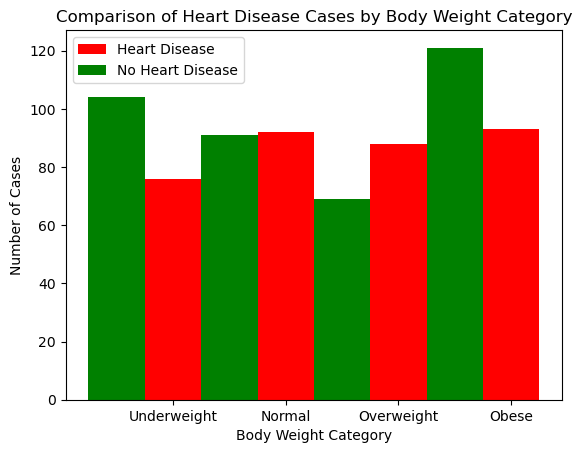

In [226]:
# Define the desired order of categories
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Filter the dataframe for heart disease cases and non-heart disease cases for different body weight categories.
heart_disease = df[df['HeartDisease'] == 1]['BodyWeightCategory']
no_heart_disease = df[df['HeartDisease'] == 0]['BodyWeightCategory']

# Set the number of categories and the width of each bar.
bar_width = 0.5

# Set the x-axis positions for the bars based on the desired order.
heart_disease_positions = range(len(categories))
no_heart_disease_positions = [x - bar_width for x in heart_disease_positions]

# Set the heights of the bars.
heart_disease_heights = [len(heart_disease[heart_disease == category]) for category in categories]
no_heart_disease_heights = [len(no_heart_disease[no_heart_disease == category]) for category in categories]

# Create the bar plot.
plt.bar(heart_disease_positions, heart_disease_heights, bar_width, label='Heart Disease', color='red')
plt.bar(no_heart_disease_positions, no_heart_disease_heights, bar_width, label='No Heart Disease', color='green')

# Add labels and title to the plot.
plt.xlabel('Body Weight Category')
plt.ylabel('Number of Cases')
plt.title('Comparison of Heart Disease Cases by Body Weight Category')

# Add x-axis tick labels based on the desired order.
plt.xticks([x for x in heart_disease_positions], categories)  # Adjusted to center x-axis labels

# Add legend to the plot.
plt.legend()

# Show the plot.
plt.show()

In [227]:
# The relation between body weight and heart disease seems rather unexpected. I thought people with a higher body weight would be more prone to heart disease
# but weight seems to have no clear effect so the "BodyWeightCategory" column will be dropped.
df = df.drop(columns=['BodyWeightCategory'])
# GeneticMarkers also seem not relevant.
df=df.drop(columns=['GeneticMarker1', 'GeneticMarker2'])
# Check out the updated df.
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,1


##### Step 4 - Feature Engineering

<sub>

- Encode categorical variables using Dummy Encoding.

</sub>

In [228]:
# Linear encoding.
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)

# Dummy encoding.
df=pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype=int)
# Check out the updated df.
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,141,289,0,173,0,0.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,158,175,0,151,0,1.0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,135,285,0,97,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,140,214,0,112,1,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,149,192,0,124,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,106,268,0,135,0,1.2,1,0,1,0,0,0,1,0,1,0,0,1,0
914,68,142,190,1,141,0,3.4,1,0,1,1,0,0,0,0,1,0,0,1,0
915,57,135,128,0,118,1,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0
916,57,128,236,0,172,0,0.0,1,1,0,0,1,0,0,1,0,0,0,1,0


##### Step 5 - Model Training

<sub>

- Import necessary libraries for model training and evaluation
- Split the dataset into training and testing sets.
- Try these supervised learning algorithms (logistic regression, decision tree, random forest and SVM) and train a model to predict income.
- Evaluate the performance of the models using accuracy.

</sub>

In [229]:
# Import libraries for model training.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Split the dataset into features (X) and target variable (y).
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Tested with a few different test sizes but 0.2 seems to be the best option.

In [230]:
# Train a Logistic Regression model.
model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

# Make predictions.
predictions_lr = model_lr.predict(X_test)

# Evaluate the performance of the model.
accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)

print(f'Logistic Regression Metrics:')
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 Score: {f1_lr}')

Logistic Regression Metrics:
Accuracy: 0.8639455782312925
Precision: 0.8904109589041096
Recall: 0.8441558441558441
F1 Score: 0.8666666666666666


In [231]:
# Train a Decision Tree model.
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Make predictions.
predictions_dt = model_dt.predict(X_test)

# Evaluate the performance of the model.
accuracy_dt = accuracy_score(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt)
recall_dt = recall_score(y_test, predictions_dt)
f1_dt = f1_score(y_test, predictions_dt)

print(f'Decision Tree Metrics:')
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')

Decision Tree Metrics:
Accuracy: 0.8163265306122449
Precision: 0.8472222222222222
Recall: 0.7922077922077922
F1 Score: 0.8187919463087249


In [232]:
# Train a SVM model.
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Make predictions.
predictions_svm = model_svm.predict(X_test)

# Evaluate the performance of the model.
accuracy_svm = accuracy_score(y_test, predictions_svm)
precision_svm = precision_score(y_test, predictions_svm)
recall_svm = recall_score(y_test, predictions_svm)
f1_svm = f1_score(y_test, predictions_svm)

print(f'SVM Metrics:')
print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')

SVM Metrics:
Accuracy: 0.6870748299319728
Precision: 0.746031746031746
Recall: 0.6103896103896104
F1 Score: 0.6714285714285714
